In [185]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [186]:
ETCGRecent_Data = Path("../Resources1/ETCGRecent_Data.csv")
GLDRecent_Data = Path("../Resources1/GLDRecent_Data.csv")
GBTCRecent_Data = Path("../Resources1/GBTCRecent_Data.csv")
SLVRecent_Data = Path("../Resources1/SLVRecent_Data.csv")
SP500Recent_Data = Path("../Resources1/SP500Recent_Data.csv")

In [187]:
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
ETCGRecent_Data_df = pd.read_csv(ETCGRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GLDRecent_Data_df = pd.read_csv(GLDRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
GBTCRecent_Data_df = pd.read_csv(GBTCRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
SLVRecent_Data_df = pd.read_csv(SLVRecent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)
SP500Recent_Data_df = pd.read_csv(SP500Recent_Data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [188]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([ETCGRecent_Data_df, GLDRecent_Data_df, GBTCRecent_Data_df, SLVRecent_Data_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns = ['ETCG', 'GLD', 'GBTC', 'SLV']

# Display a few rows
combined_df.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,18.90,152.41,12.33,17.14
2020-02-21,19.66,154.70,12.54,17.28
2020-02-24,19.50,156.09,11.72,17.40
2020-02-25,15.80,153.30,10.54,16.71
2020-02-26,15.25,153.97,10.36,16.68


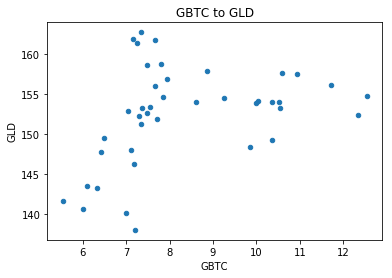

In [227]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='GBTC', y='GLD', title = "GBTC to GLD")

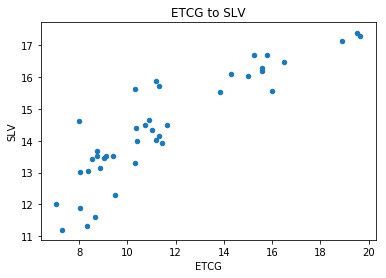

In [228]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='ETCG', y='SLV', title = "ETCG to SLV")

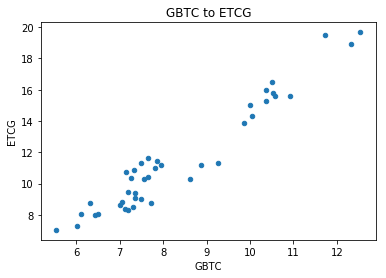

In [229]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='GBTC', y='ETCG', title = "GBTC to ETCG")

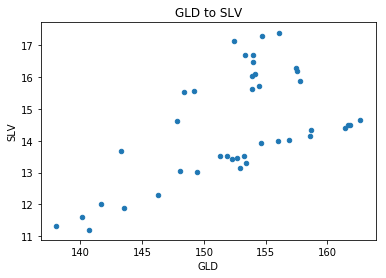

In [230]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='GLD', y='SLV', title = "GLD to SLV")

In [193]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


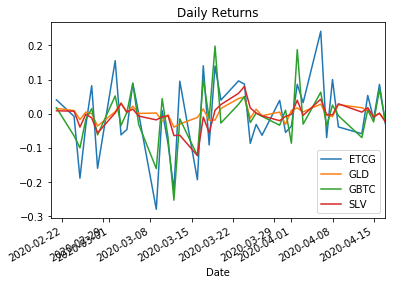

In [259]:
daily_returns.plot(title = "Daily Returns")

In [195]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

GLD     0.322738
SLV     0.565561
GBTC    1.292388
ETCG    1.751277
dtype: float64

In [196]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
weights = [0.25, 0.25, 0.25, 0.25]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2020-02-20         NaN
2020-02-21    0.020109
2020-02-24   -0.014400
2020-02-25   -0.086989
2020-02-26   -0.012328
dtype: float64

In [197]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

Date
2020-02-20         NaN
2020-02-21    1.020109
2020-02-24    1.005420
2020-02-25    0.917959
2020-02-26    0.906643
dtype: float64

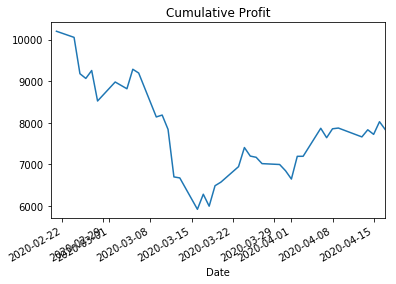

In [260]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot(title = "Cumulative Profit")

In [199]:
# Re-calculate daily returns as the DataFrame was modified in part 1
daily_returns = combined_df.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


In [200]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = daily_returns.corr()
correlation

,ETCG,GLD,GBTC,SLV
ETCG,1.000000,0.437394,0.799494,0.546394
GLD,0.437394,1.000000,0.316546,0.761823
GBTC,0.799494,0.316546,1.000000,0.527541
SLV,0.546394,0.761823,0.527541,1.000000


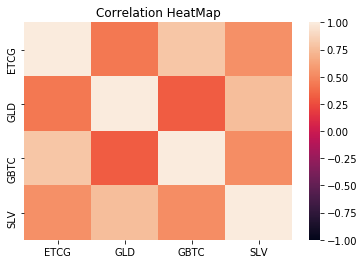

In [266]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
hm = sns.heatmap(correlation, vmin=-1, vmax=1,) 
hm.set_title("Correlation HeatMap") 
hm

In [202]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

ETCG   -0.944460
GLD     0.930840
GBTC   -1.766607
SLV    -1.847624
dtype: float64

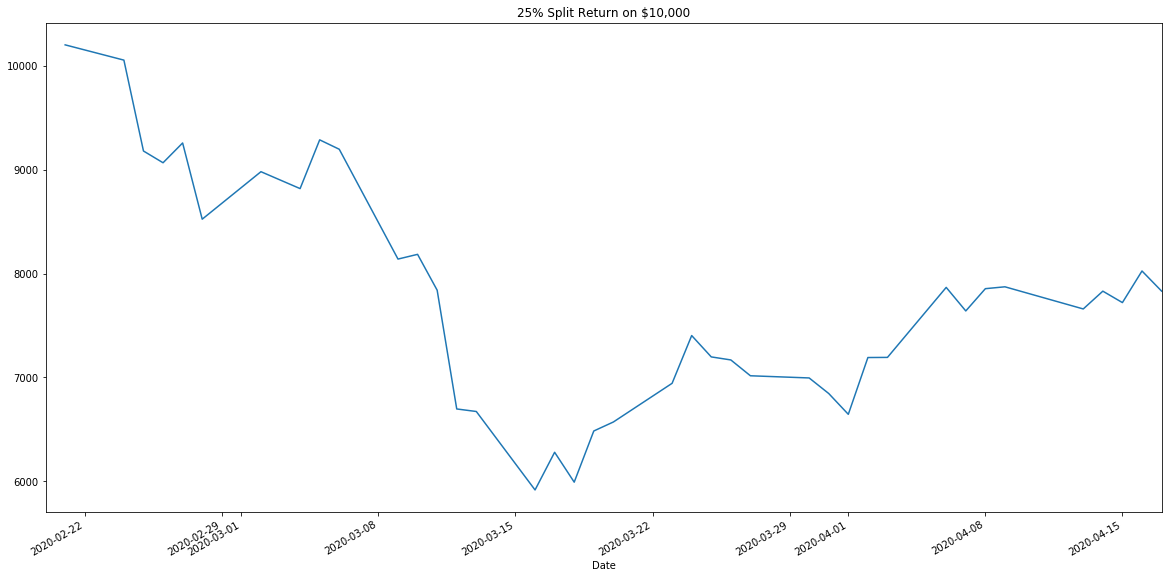

In [267]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.25, .25, .25, .25]
candidate_portfolio_returns = daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.plot(figsize=(20,10), title = "25% Split Return on $10,000")

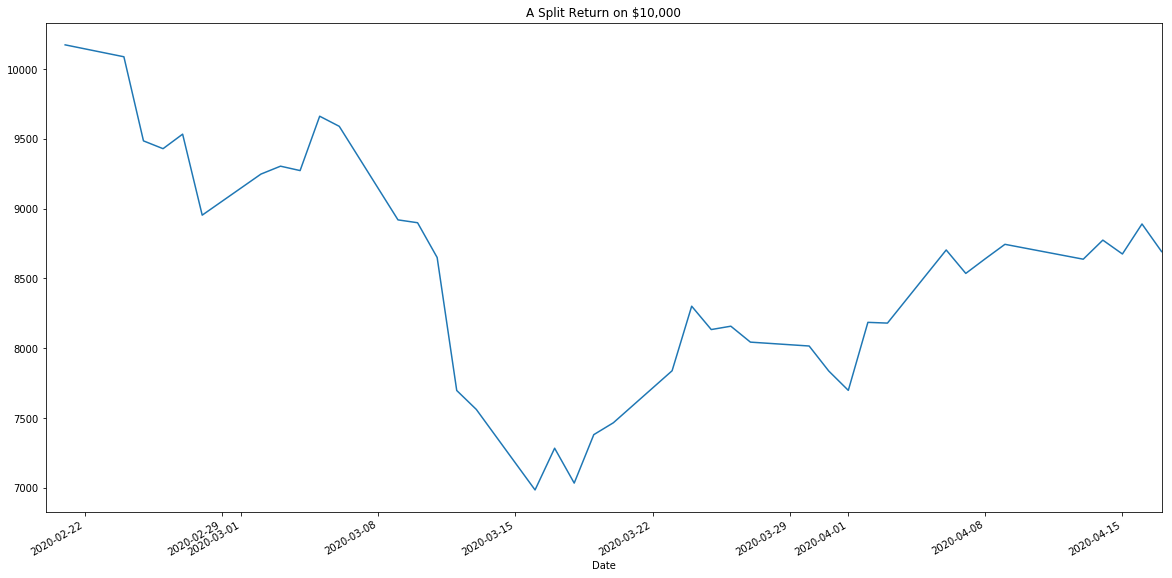

In [273]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio
initial_investment = 10000
weights = [0.125, 0.5, 0.2, 0.175]
A_correlated_portfolio_returns = daily_returns.dot(weights)
A_correlated_cumulative_returns = (1 + A_correlated_portfolio_returns).cumprod()
A_correlated_cumulative_profits = (initial_investment * A_correlated_cumulative_returns)
A_correlated_cumulative_profits.plot(figsize=(20,10), title = "A Split Return on $10,000")

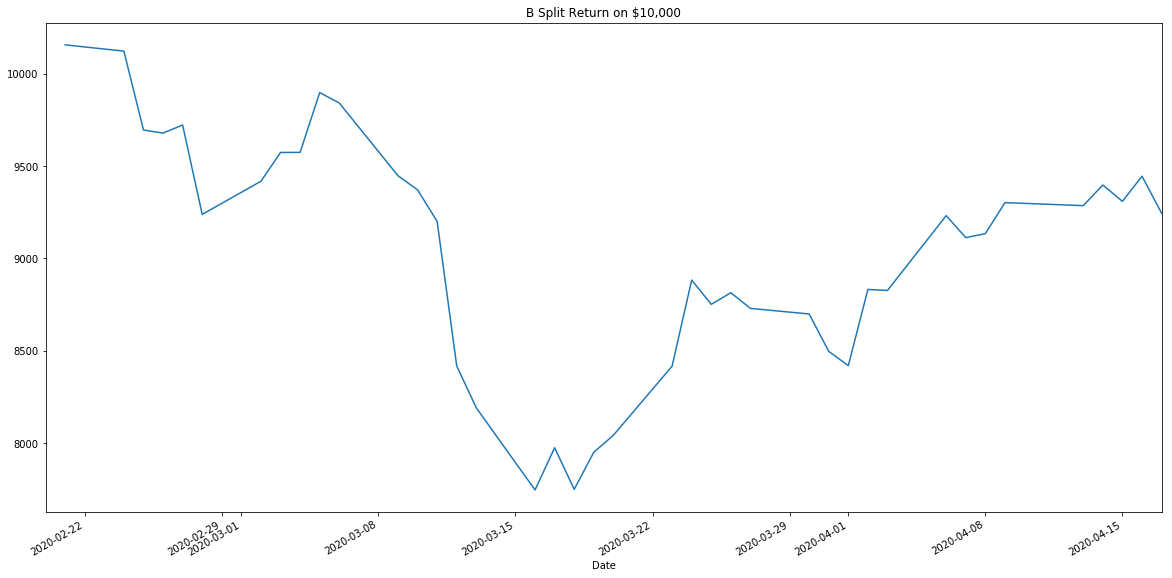

In [274]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.05, .65, .15, .15]
B_candidate_portfolio_returns = daily_returns.dot(weights)
B_candidate_cumulative_returns = (1 + B_candidate_portfolio_returns).cumprod()
B_candidate_cumulative_profits = (initial_investment * B_candidate_cumulative_returns)
B_candidate_cumulative_profits.plot(figsize=(20,10), title = "B Split Return on $10,000")

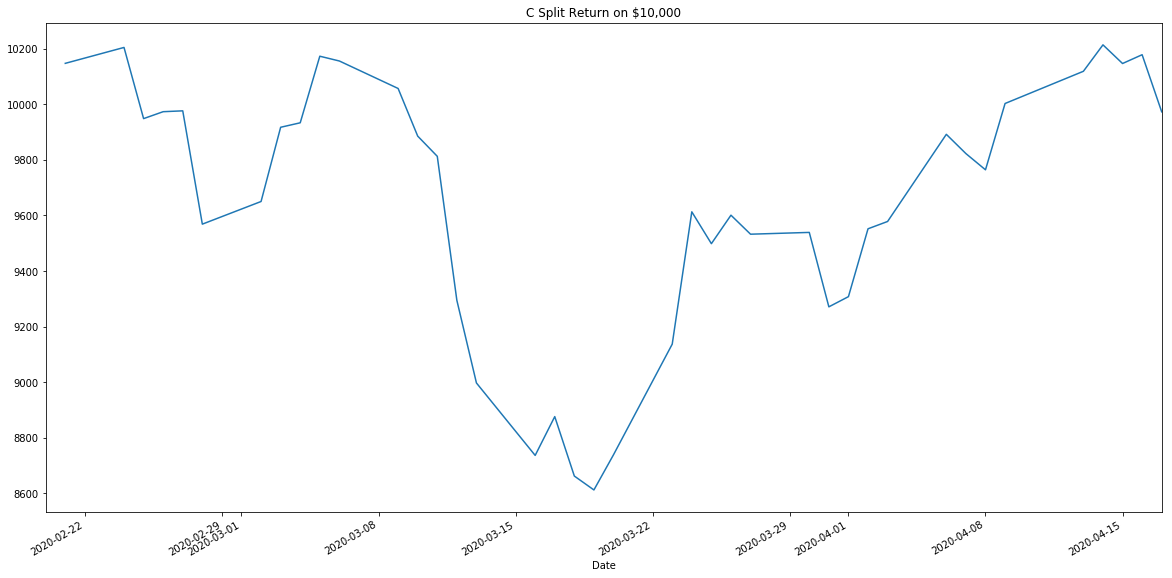

In [275]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.01, .85, .04, .1]
C_candidate_portfolio_returns = daily_returns.dot(weights)
C_candidate_cumulative_returns = (1 + C_candidate_portfolio_returns).cumprod()
C_candidate_cumulative_profits = (initial_investment * C_candidate_cumulative_returns)
C_candidate_cumulative_profits.plot(figsize=(20,10), title = "C Split Return on $10,000")

In [207]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df1 = pd.concat([ETCGRecent_Data_df, GBTCRecent_Data_df, GLDRecent_Data_df, SLVRecent_Data_df, SP500Recent_Data_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df1.sort_index(inplace=True)

# Display a few rows
combined_df1.head()


,Close,Close,Close,Close,Close
Date,,,,,
2020-02-20,18.90,12.33,152.41,17.14,3373.23
2020-02-21,19.66,12.54,154.70,17.28,3337.75
2020-02-24,19.50,11.72,156.09,17.40,3225.89
2020-02-25,15.80,10.54,153.30,16.71,3128.21
2020-02-26,15.25,10.36,153.97,16.68,3116.39


In [208]:
# Rename the columns to match the corresponding stock
combined_df1.columns = ['ETCG', 'GLD', 'GBTC', 'SLV', 'SP500']
combined_df1.head()

,ETCG,GLD,GBTC,SLV,SP500
Date,,,,,
2020-02-20,18.90,12.33,152.41,17.14,3373.23
2020-02-21,19.66,12.54,154.70,17.28,3337.75
2020-02-24,19.50,11.72,156.09,17.40,3225.89
2020-02-25,15.80,10.54,153.30,16.71,3128.21
2020-02-26,15.25,10.36,153.97,16.68,3116.39


In [209]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns1 = combined_df1.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


In [210]:
# Calculate covariance of all daily returns
GBTCcovariance = daily_returns1['GBTC'].cov(daily_returns1['SP500'])

ETCGcovariance = daily_returns1['ETCG'].cov(daily_returns1['SP500'])

SLVcovariance = daily_returns1['SLV'].cov(daily_returns1['SP500'])

GLDcovariance = daily_returns1['GLD'].cov(daily_returns1['SP500'])

In [211]:
# Calculate variance of all daily returns
ETCGvariance = daily_returns1['ETCG'].var()

GLDvariance = daily_returns1['GLD'].var()

GBTCvariance = daily_returns1['GBTC'].var()

SLVvariance = daily_returns1['SLV'].var()

In [212]:
# Calculate beta of all daily returns of all
GBTC_beta = GBTCcovariance / GBTCvariance

ETCG_beta = ETCGcovariance / ETCGvariance

GLD_beta = GLDcovariance / GLDvariance

SLV_beta = SLVcovariance / SLVvariance

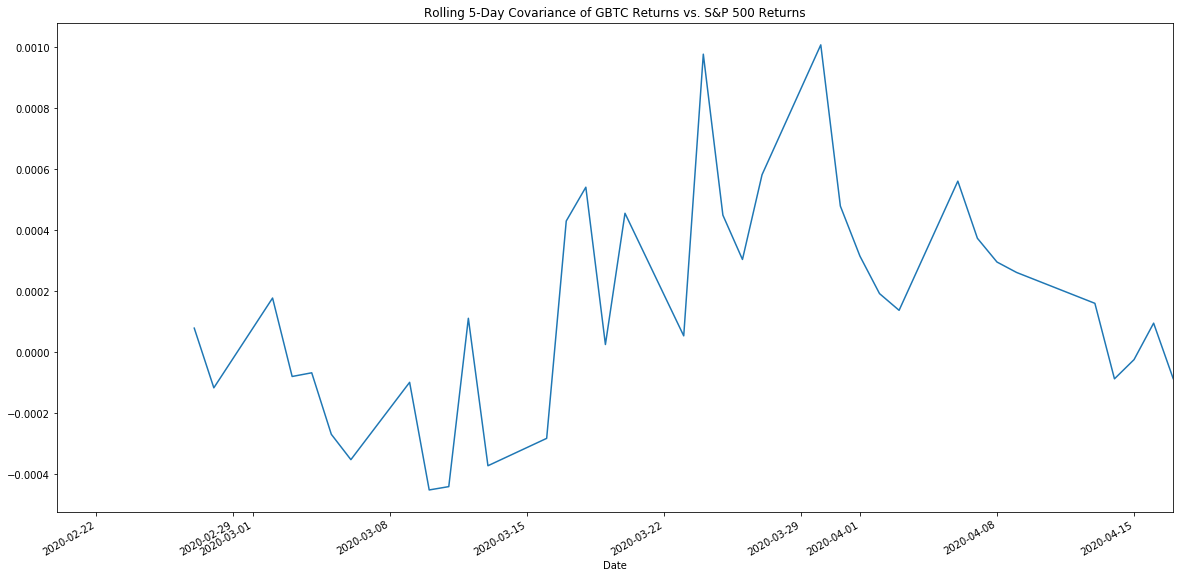

In [213]:
# Calculate 5-day rolling covariance of GBTC vs. S&P 500 and plot the data
GBTCrolling_covariance = daily_returns1['GBTC'].rolling(window=5).cov(daily_returns1['SP500'])
GBTCrolling_covariance.plot(figsize=(20, 10), title='Rolling 5-Day Covariance of GBTC Returns vs. S&P 500 Returns')

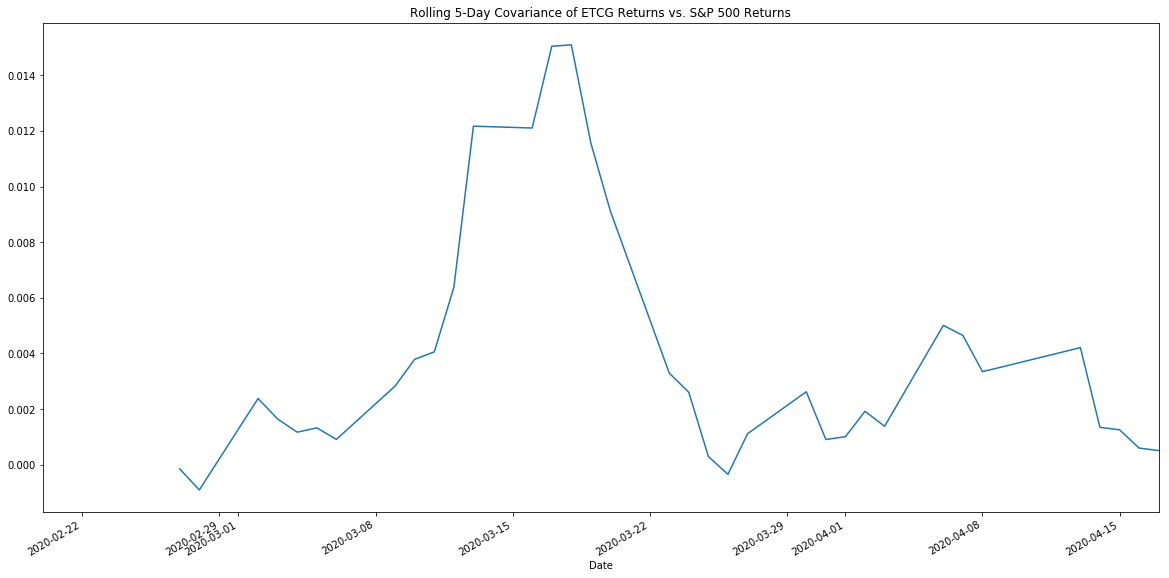

In [214]:
# Calculate 5-day rolling covariance of ETCG vs. S&P 500 and plot the data
ETCGrolling_covariance = daily_returns1['ETCG'].rolling(window=5).cov(daily_returns1['SP500'])
ETCGrolling_covariance.plot(figsize=(20, 10), title='Rolling 5-Day Covariance of ETCG Returns vs. S&P 500 Returns')

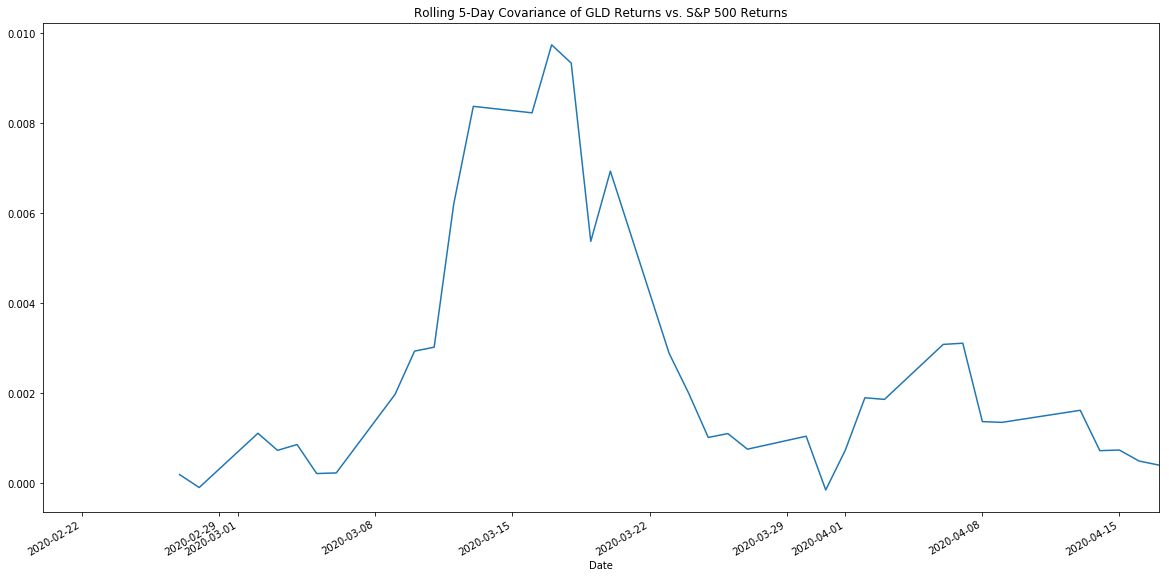

In [215]:
# Calculate 5-day rolling covariance of GLD vs. S&P 500 and plot the data
GLDrolling_covariance = daily_returns1['GLD'].rolling(window=5).cov(daily_returns1['SP500'])
GLDrolling_covariance.plot(figsize=(20, 10), title='Rolling 5-Day Covariance of GLD Returns vs. S&P 500 Returns')

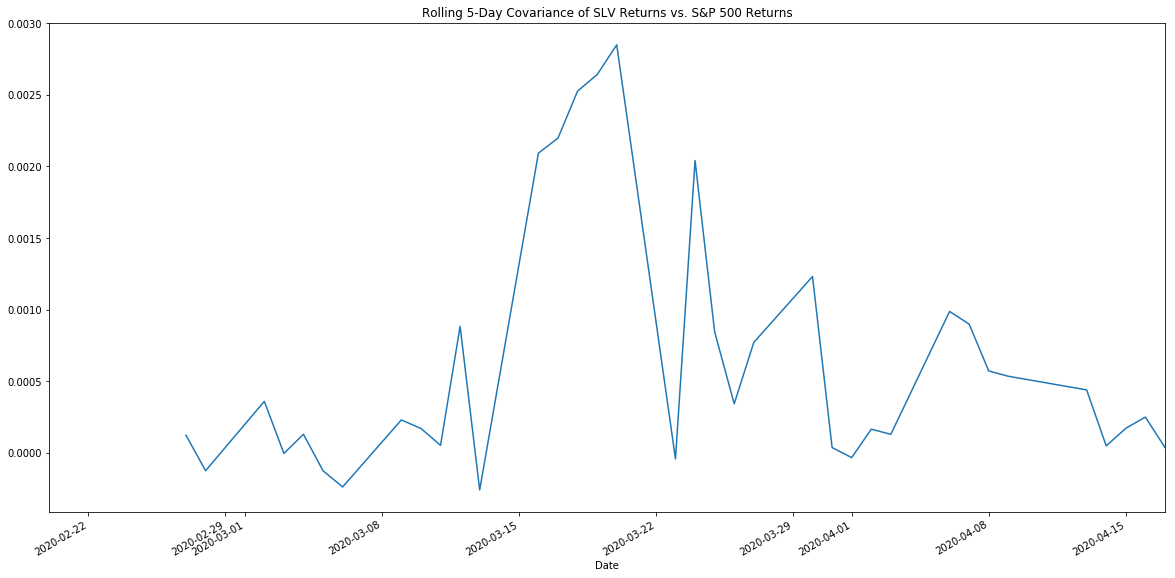

In [216]:
# Calculate 5-day rolling covariance of SLV vs. S&P 500 and plot the data
SLVrolling_covariance = daily_returns1['SLV'].rolling(window=5).cov(daily_returns1['SP500'])
SLVrolling_covariance.plot(figsize=(20, 10), title='Rolling 5-Day Covariance of SLV Returns vs. S&P 500 Returns')

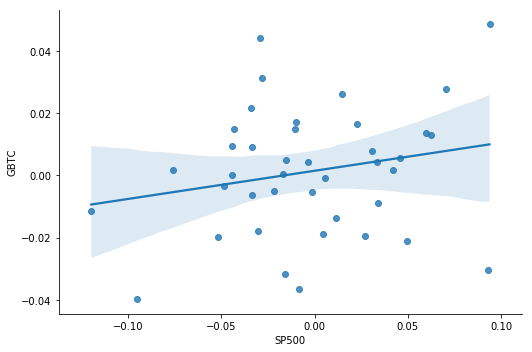

In [272]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='SP500', y='GBTC', data=daily_returns1, aspect=1.5, fit_reg=True)

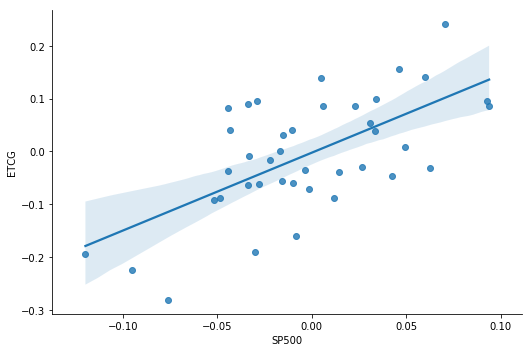

In [218]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='SP500', y='ETCG', data=daily_returns1, aspect=1.5, fit_reg=True)

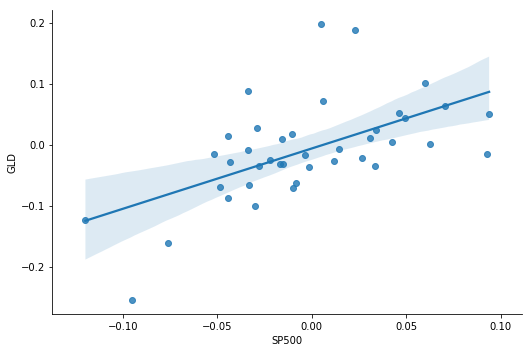

In [219]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='SP500', y='GLD', data=daily_returns1, aspect=1.5, fit_reg=True)

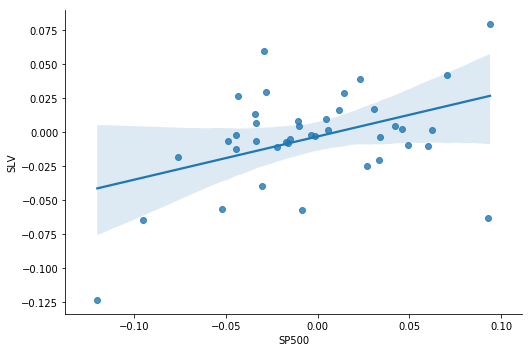

In [220]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='SP500', y='SLV', data=daily_returns1, aspect=1.5, fit_reg=True)

In [221]:
daily_returns = combined_df.pct_change()
daily_returns.head()

,ETCG,GLD,GBTC,SLV
Date,,,,
2020-02-20,NaN,NaN,NaN,NaN
2020-02-21,0.040212,0.015025,0.017032,0.008168
2020-02-24,-0.008138,0.008985,-0.065391,0.006944
2020-02-25,-0.189744,-0.017874,-0.100683,-0.039655
2020-02-26,-0.034810,0.004371,-0.017078,-0.001795


In [222]:
avg_daily_return = daily_returns.mean()
avg_daily_return

ETCG   -0.006564
GLD     0.001192
GBTC   -0.009060
SLV    -0.004147
dtype: float64

In [223]:
std_dev_daily_return = daily_returns.std()
std_dev_daily_return

ETCG    0.110320
GLD     0.020331
GBTC    0.081413
SLV     0.035627
dtype: float64

In [285]:
# Set number of trading days and simulations and get last closing price of stocks from DataFrame
num_trading_days = 100
num_simulations = 100
GLD_last_price = combined_df['GLD'][-1]
GBTC_last_price = combined_df['GBTC'][-1]
ETCG_last_price = combined_df['ETCG'][-1]
SLV_last_price = combined_df['SLV'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

# Initialize the simulated prices list with the last closing price of stocks
    simulated_GLD_prices = [GLD_last_price]
    simulated_GBTC_prices = [GBTC_last_price]
    simulated_ETCG_prices = [ETCG_last_price]
    simulated_SLV_prices = [SLV_last_price]

    # Simulate the returns for 100 trading days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list then append
        GLD_simulated_price = simulated_GLD_prices[-1] * (1 + np.random.normal(avg_daily_return[0], std_dev_daily_return[0]))
        simulated_GLD_prices.append(GLD_simulated_price)
    
        GBTC_simulated_price = simulated_GBTC_prices[-1] * (1 + np.random.normal(avg_daily_return[1], std_dev_daily_return[1]))
        simulated_GBTC_prices.append(GBTC_simulated_price)
    
        ETCG_simulated_price = simulated_ETCG_prices[-1] * (1 + np.random.normal(avg_daily_return[2], std_dev_daily_return[2]))
        simulated_ETCG_prices.append(ETCG_simulated_price)
    
        SLV_simulated_price = simulated_SLV_prices[-1] * (1 + np.random.normal(avg_daily_return[3], std_dev_daily_return[3]))
        simulated_SLV_prices.append(SLV_simulated_price)
       
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df = pd.DataFrame({
        "Simulated GLD Prices": simulated_GLD_prices,
        "Simulated GBTC Prices": simulated_GBTC_prices,
        "Simulated ETCG Prices": simulated_ETCG_prices,
        "Simulated SLV Prices": simulated_SLV_prices
        })
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights 
    weights = [0.25, 0.25, 0.25, 0.25]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()


## Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997850,0.973615,1.011335,0.960586,0.954248,1.007759,0.995552,1.020578,0.956441,0.976468,...,1.000208,1.015630,1.037427,0.999201,1.013450,0.939011,0.974579,1.049725,1.022126,0.931179
2,1.068681,1.038411,1.020876,0.977815,0.975213,0.976006,1.055721,1.000829,0.958628,0.966511,...,0.922127,1.057824,1.069773,0.992086,1.052443,0.899103,0.927419,1.034460,1.013496,0.876806
3,1.123783,1.030937,1.022919,1.036607,0.957447,0.963387,1.074703,0.980190,0.880067,0.969391,...,0.903750,1.064544,1.028780,0.990689,1.042062,0.878000,0.899992,0.995946,0.957117,0.864550
4,1.112528,1.115645,1.039866,1.070942,0.957960,0.916076,1.063991,0.964130,0.856956,0.929639,...,0.810732,1.073702,0.988012,0.983086,1.044996,0.941758,0.891348,1.016725,0.906926,0.855543


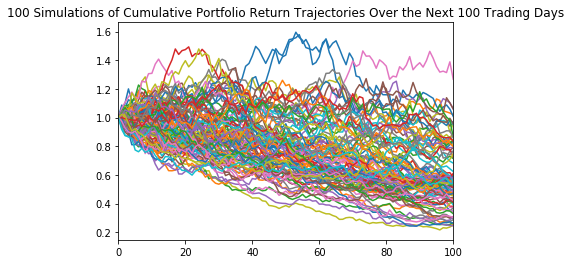

In [286]:
# Use the `plot` function to plot `100` simulations of the potential trajectories of the portfolio based on 100 trading days
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 100 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [287]:
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    0.510456
1    1.019434
2    0.714637
3    0.381721
4    0.578532
Name: 100, dtype: float64

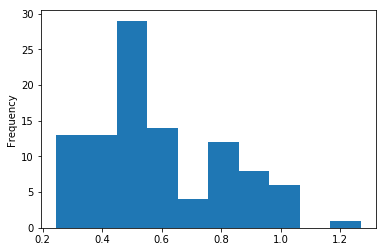

In [288]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
ending_cumulative_returns.plot(kind='hist', bins=10)

In [289]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns)

(0.45, 0.552]     0.29
(0.552, 0.654]    0.14
(0.347, 0.45]     0.13
(0.243, 0.347]    0.13
(0.757, 0.859]    0.12
(0.859, 0.961]    0.08
(0.961, 1.063]    0.06
(0.654, 0.757]    0.04
(1.166, 1.268]    0.01
(1.063, 1.166]    0.00
Name: 100, dtype: float64

In [290]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = ending_cumulative_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.256096
0.975    1.040123
Name: 100, dtype: float64

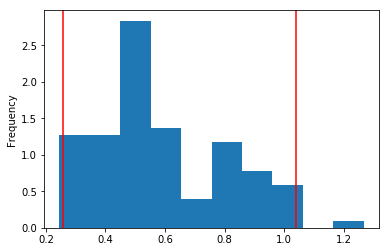

In [295]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [293]:
# Set initial investment
initial_investment = 10000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment * confidence_interval.iloc[0]
investment_pnl_upper_bound = initial_investment * confidence_interval.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 100 trading days will end within in the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 100 trading days will end within in the range of $2560.9621820636044 and $10401.234921780431
